In [50]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np # Linear Algebra
import pandas as pd # Data Processing

np.random.seed(42)

df = pd.read_csv('TSLA.csv')

#df = df.drop(['Date'], axis=1)

df.head(n=5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# Isolation Forest
---
Identify outliers  in multidimensional space

Built on the basis of decision trees, in principle, outliers lie further away from regular observations. Which is why with random partitioning an outlier should be identified closer to the root of the tree with fewer splits necessary.

An anomaly score is required for decision making and is defined between [0,1] with .5 being a normal observation

Contamination parameter, specifies the percentage of observations we believe to be outliers (scikit-learn’s default value is 0.1)

Parameter specification will help determine the fit of the model; Scales up well, it seems to work well with high dimensional problems that may have a large number of irrelevant attributes

Principle Component Analysis is the widest used data reduction technique; reframe the data for ideal clustering and ML; Dimensions or axis are ordered from most to least useful. PCA is a data transformation technique that makes data aminable to reduction later on; For PCA to work start by standardizing the data meaning the dimensiona are centerd around 0 with a std dev of 1. Find a new dimension or principle component so that the spread of the data is maximized; Projects data into lower dimensional space with minimal information loss; For the scope of this project PCA is used for data visualization instead of for speeding up the algorithm

1    2174
-1     242
Name: anomaly, dtype: int64


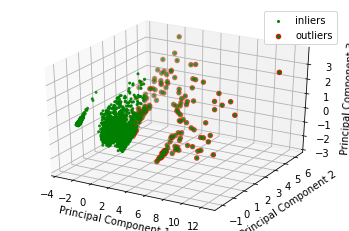

In [60]:
# Created an anomaly detection classifier, isolation forest; then I did dimensionality reduction so that the anomalies could be viewed in 3d and 2d space. Then I added and additional column to the df to indicate whether the data point is an anomaly. That is pretty cool.
# Pivot funcition in pd let's us change the index, col, and values
# Anna is the key;

clf = IsolationForest(n_estimators=100, contamination=.1, max_samples='auto', max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)


to_model_columns = df.columns[1:len(df.columns)]

clf.fit(df[to_model_columns])

pred = clf.predict(df[to_model_columns])
df['anomaly'] = pred
outliers = df.loc[df['anomaly'] == -1]
outlier_index=list(outliers.index)

print(df['anomaly'].value_counts())

pca = PCA(n_components=3) # Reduce to k=3 dimensions
scaler = StandardScaler()

# Normalize the metrics

X = scaler.fit_transform(df[to_model_columns])
X_reduce = pca.fit_transform(X)
principalDF = pd.DataFrame(data=X_reduce, columns=['principal component 1', 'principal component 2', 'principal component 3'])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Plot the compressed data points

ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers", c="green")

# Plot x's for the ground truth outliers

ax.scatter(X_reduce[outlier_index, 0], X_reduce[outlier_index, 1], X_reduce[outlier_index, 2], lw=1, s=20, edgecolor="red", c="green", label="outliers")

ax.legend()
plt.show()

In [59]:
principalDF.head(5)

,principal component 1,principal component 2,principal component 3
0,-2.147981,4.475078,0.952988
1,-2.164735,4.289616,0.687943
2,-2.671870,3.318000,-0.738378
3,-2.874084,2.989875,-1.222844
4,-2.839830,3.189387,-0.936216


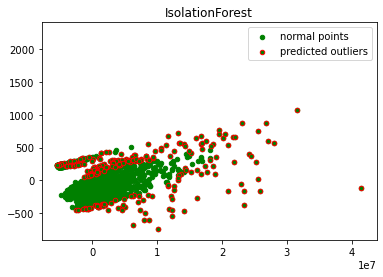

In [52]:
pca = PCA(2)
pca.fit(df[to_model_columns])

res = pd.DataFrame(pca.transform(df[to_model_columns]))

Z = np.array(res)

plt.title("IsolationForest")
plt.contourf(Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(res[0], res[1], c='green', s=20,label="normal points")

b1 = plt.scatter(res.iloc[outlier_index,0], res.iloc[outlier_index,1], c='green', s=20, edgecolor="red", label="predicted outliers")

plt.legend(loc="upper right")
plt.show()

In [53]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,anomaly
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,-1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,-1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,-1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,-1
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,-1
